In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv(r"E:\DS-ML-NLP\dataset\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


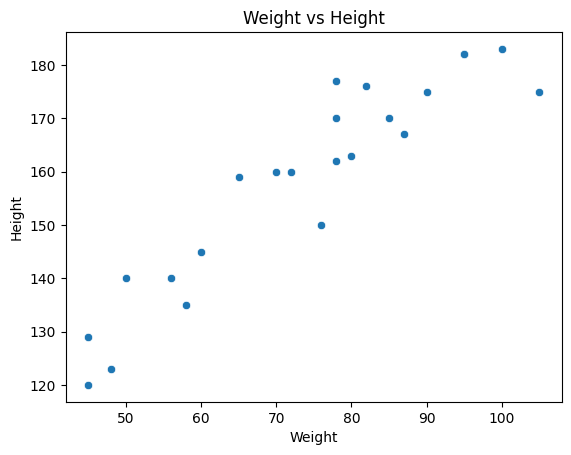

In [37]:
sns.scatterplot(x='Weight', y='Height', data=df)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.show()

In [38]:
x=df[['Weight']] #independent variable
y=df['Height'] #dependent variable

In [39]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [40]:
x.shape

(23, 1)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [42]:
#standerdize the data
from sklearn.preprocessing import StandardScaler #apply z-score normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# x_train.head()
x_test=scaler.transform(x_test)


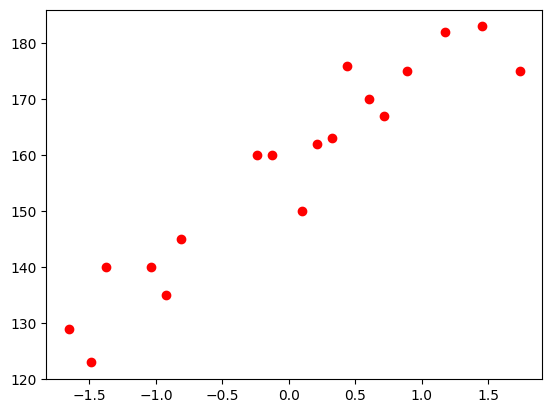

In [43]:
plt.scatter(x_train,y_train,color='red')

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
print("slop is ",model.coef_) 
model.intercept_

slop is  [17.03440872]


np.float64(157.5)

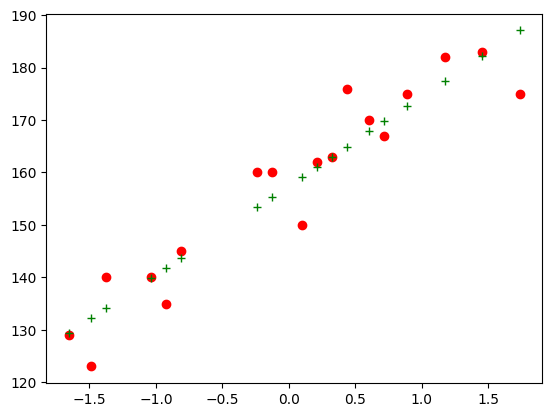

In [46]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train), 'g+')

### prediction on train data
y_pred_train=157.5+17.03(x_train)
### prediction on test data
y_pred_test=157.2+17.03(x_test)

In [47]:
y_pred_test=model.predict(x_test)
print("y_pred_test is ",y_pred_test)

y_pred_test is  [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [52]:


print("Actual\tPredicted")
for actual, pred in zip(y_test, y_pred_test):
    print(f"{actual:.2f}\t{pred:.2f}")


Actual	Predicted
177.00	161.08
170.00	161.08
120.00	129.30
182.00	177.46
159.00	148.57


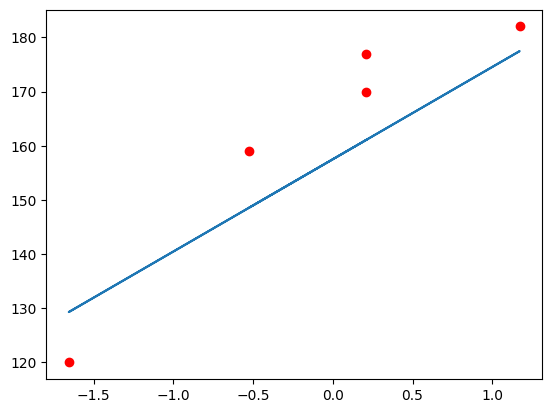

In [54]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, model.predict(x_test)
         )

In [56]:
# performance metrics
#r2 amd adjusted r2
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))     
print("R-squared:", r2_score(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_test)))




Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
R-squared: 0.776986986042344
Root Mean Squared Error: 10.477400726827081


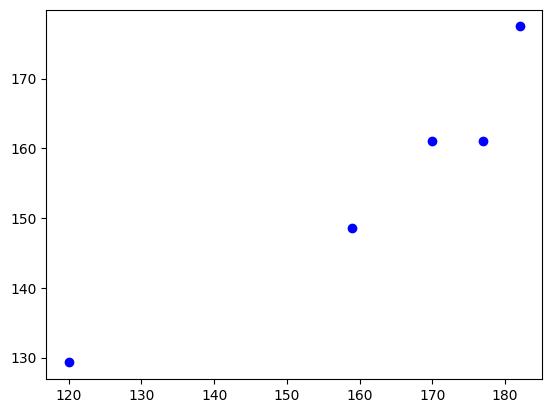

In [57]:
plt.scatter(y_test, y_pred_test, color='blue')

In [59]:
#residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\Pratik Giri\AppData\Local\Temp\ipykernel_13788\3251552378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

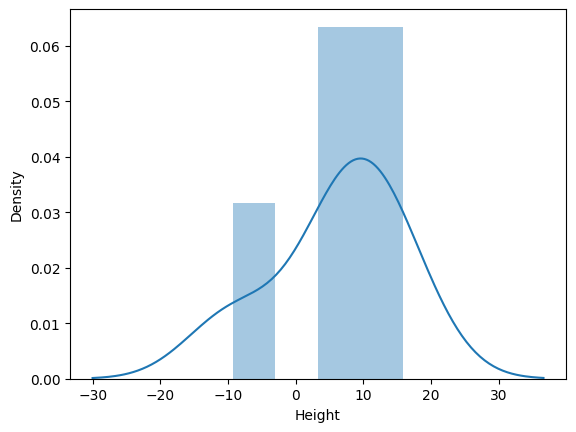

In [62]:
import seaborn as sns
sns.distplot(residuals, kde=True)